# 3章 分類

## 3.1 MNIST

この章では、MNISTデータベースを使う。MNISTは、高校生や合衆国国税調査局の職員が手書きした70,000個の数字画像のデータセットである。個々の画像には、表している数値のラベルが付けられている。このデータセットは非常によく使われてきたので、機械学習のHello Worldと呼ばれることも多い。新しい分類アルゴリズムが登場するたびに、MNISTでどの程度の性能が出るのかが関心を集める。機械学習を学ぶ人々は、遅かれ早かれMNISTに挑むことになる。

scikit-learnには、よく使われるデータセットをダウンロードするためのヘルパー関数が多数含まれている。MNISTもそのようなデータセットのひとつである。次のコードは、MNISTデータセットをフェッチする。

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original', data_home='./datasets/mnist_data/')
mnist

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

scikit-learnがロードするデータセットは、一般にほぼ同じ辞書構造になっている。
- DESCRキーは、データセットの説明を格納する。
- dataキーは、インスタンスごとに1行、特徴量ごとに1列という形の配列を格納する。
- targetキーは、ラベルの配列を格納する。
これらの配列を見てみよう。

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

70,000個の画像があり、個々の画像には784個の特徴量がある。これは、各画像が28×28ピクセルで、個々の特徴量は0(白)から255(黒)までの値でピクセルのメイドを表しているからである。データセットのなかの数字をひとつ覗いてみよう。インスタンスの特徴量ベクトルを取り出し、28×28の配列に形状変換し、Matplotlibのimshow()関数で表示するだけのことだ。

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

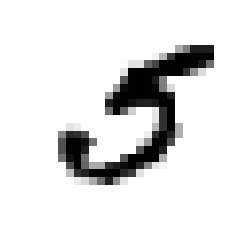

In [6]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

これは5のように見えるが、実際にラベルはそうだと言っている。

In [7]:
y[36000]

5.0

ちょっと待った！データを詳しく調べる前に、テストセットを作って封印しなければならないはずだ。MNISTデータセットは、実際にはすでに訓練セット(最初の6万画像)とテストセット(後ろの1万画像)に分かれている。

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

さらに、訓練セットをシャッフルしておこう。そうすれば、交差検証のフォールドが同じようなものになる(いくつかの数字がないフォールドができては困る)。また、一部の学習アルゴリズムは訓練インスタンスの順序の影響を受け、同じようなインスタンスが立て続けに登場すると性能が劣化するが、シャッフルすればそのようなことのないデータセットが得られる。

In [9]:
import numpy as np

In [10]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2 二項分類器の訓練

とりあえず、問題を単純化して1個の数字だけを識別できるようにしてみよう。たとえば5である。この5検出器は、5と5以外のふたつのクラスだけを区別できる**二項分別器**(binary classifier)の例である。この分類タスクのターゲットベクトルを作ろう。

In [11]:
y_train_5 = (y_train == 5) # 5に対してはTrue, それ以外の数字に対してはFalse
y_test_5 = (y_test == 5)

では、分類器を選んで訓練しよう。scikit-learnのSGDClassifierクラスを使って、**確率的勾配降下法**(Stochatic Gradient Descent: SGD)の分類器から試してみるのが出発点としてはよい。この分類器には、非常に大規模なデータセットを効率よく扱えるという長所がある。その理由の一部は、後述のようにSGDが訓練インスタンスを1度にひとつずつ独立に扱うことにあるセット全体で訓練してみよう。

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

これで分類器を使って数字の5の画像を検出できる。

In [14]:
sgd_clf.predict([some_digit])

array([False])

分類器は、この画像が5(True)を表していることを推測している。この特定の例については正しく推測できたようだ。それでは、このモデルの性能を評価してみよう。

## 3.3 性能指標

分類器の評価は回帰器の評価よりもはるかに難しいので、この章は、かなりの部分をこのテーマのために割くことになる。使われている性能指標は非常に多いので、ここでもう1杯コーヒーを用意して、新しい概念や頭字語をたくさん学ぶ心の準備をしておこう。

## 3.3.1 交差検証を使った正解率の測定

モデルの評価には、2章でも使った交差検証を使うとよい。

それでは、cross_val_score()関数を使って、3フォールドのK分割交差検証でSGDClassifierモデルを評価してみよう。K分割交差検証とは、訓練セットをK個(この場合は3個)のフォールドに分割し、検証用のフォールド以外のフォールドを使って訓練したモデルで検証用のフォールドを評価するものだということを思い出そう。

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([0.9652 , 0.95735, 0.96215])

なんと、96%もの**正解率**(正しい予測の割合: accuracy)が出ている。すばらしい数字ではないだろうか。いや、あまり興奮しすぎないうちに、すべての画像を「5以外」クラスに分類するダム分類器の結果を見てみよう。

In [16]:
from sklearn.base import BaseEstimator

In [17]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

このモデルの正解率はどれくらいだろうか。実際に見てみよう。

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91165, 0.90945, 0.90785])

うそではない。90%以上の正解率を示しているのである。これは、画像の約10%が5だからということに過ぎない。いつも5ではないと予測していれば、約90%の確率で当たる。ノストラダムスもびっくりである。

これは、分類器の性能指標として正解率が一般的に好まれない理由を示している。特に**歪んだデータセット**(skewed dataset)、つまり一部のクラスがほかのクラスよりも出現頻度が高いデータセットでは正解率はあてにならない。

## 3.3.2 混同行列

分類器の性能の評価方法としては**混同行列**(confusion matrix)の方がはるかに優れている。基本的な考え方は、クラスAのインスタンスがクラスBに分類された回数を数えるというものである。たとえば、分類器が5の画像を3と混同した回数は、混同行列の第5行第3列を見ればわかる。

混同行列を計算するためには、まず、実際のターゲットと比較できる予測の集合が必要である。テストセットを使って予測してもよいが、今の段階ではさしあたりテストセットには手を触れずに残しておこう(テストセットは、本番稼働に回せる分類器が完成しているプロジェクトの最後の段階だけで使うべきだということを忘れないようにしよう)。代わりに、cross_val_predict()関数を使えばよい。

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

cross_val_predict()関数は、cross_val_score()関数と同様にK分割交差検証を行うが、評価のスコアではなく、個々のテストフォールドに対する予測結果を返すのである。そのため、訓練セットの個々のインスタンスに対するクリーンな予測が得られる(クリーンとは、訓練中にデータを見ていないモデルで予測が行われるという意味である)。

これで、confusion_matrix()関数を使って混同行列を得る準備が整った。この関数には、単純にターゲットクラス(y_train_5)と予測されたクラス(y_train_pred)を渡せばよい。

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_train_5, y_train_pred)

array([[53748,   831],
       [ 1475,  3946]], dtype=int64)

混同行列の各行は**実際のクラス**、各行は**予測したクラス**を表す。行列の第1行は5以外の画像(**陰性クラス**: negative class)であり、そのうち54,028件は正しく5以外と分類され(**真陰性**: true negative)、551件は誤って5と分類されている(**偽陽性**: false positive)。それに対し、行列の第2行は5の画像(**陽性クラス**: positive class)であり、そのうち1,553件は誤って5以外と分類され(**偽陰性**: false negative)、3,868件は正しく5と分類されている(**真陽性**: true positive)。分類器が完全なら真陽性と真陰性だけで、混同行列で0以外の値が含まれるのは対角線(左上から右下)だけになる。

混同行列は盛りだくさんの情報を与えてくれるが、もっと簡潔な指標がほしい場合もある。注目すべき情報は、陽性の予測の正答率である。これを分類器の**適合率**(precision)と呼ぶ(式3-1)。
$$
    {\rm precision} = \frac{TP}{TP + FP} \tag{3-1}
$$
TPは真陽性の数、FPは偽陽性の数である。

完璧は適合率をお手軽に実現するには、1個の陽性予測を行い、それをかならず正しいものにすることである(適合率=1/1=100%)。しかし、それでは分類器は1個の陽性インスタンス以外のインスタンスを無視してしまうことになり、あまり役に立たない。そこで、適合率は一般に**再現率**(recall)と呼ばれる別の指標と併用される。再現率は、**感度**(sensitivity)とか**真陽性率**(true positive rate: TPR)とも呼ばれる。これは分類器が正しく分類した陽性インスタンスの割合である(式3-2)。
$$
    {\rm recall} = \frac{TP}{TP + FN} \tag{3-2}
$$
FNはもちろん陰性性の数である。

## 3.3.3 適合率と再現性

scikit-learnは、適合率や再現率を含む分類器の性能指標を計算するための関数を複数提供している。

In [23]:
from sklearn.metrics import precision_score, recall_score

In [24]:
precision_score(y_train_5, y_train_pred)

0.826041448607913

In [25]:
recall_score(y_train_5, y_train_pred)

0.7279099797085409

適合率を見ると、あなたの5検出器は以前ほどすばらしいものには見えないだろう。この画像は5だと言っていても、その予測が正しいのは、わずか77%のときだけである。しかも、すべての5の71%しか検出できない。

特にふたつの分類器を比較するための単純な方法が必要な場合などには、適合率と再現率をひとつにまとめた**F値**($F_1$score)が便利である。F値は適合率と再現率の**調和平均**(harmonic mean)である(式3-3)。通常の平均がすべての値を同じように扱うのに対し、調和平均は低い値にそうでない値よりもずっと大きな重みを置く。そのため、適合率と再現率の両方が高くなければ、分類器のF値は高くならない。
$$
    F_1 = \frac{2}{\frac{1}{\rm precision} + \frac{1}{\rm recall}}
        = 2 \times \frac{{\rm precision} \times {\rm recall}}{{\rm precision} + {\rm recall}}
        = \frac{TP}{TP + \frac{FN + FP}{2}} \tag{3-3}
$$
F値は、f1_score()関数を呼び出せば計算できる。

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_train_5, y_train_pred)

0.7738772308295744

F値は、適合率と再現率が同じように高い分類器を高く評価するが、いつもそれが望ましいわけではない。適合率の方が重視される場合や再現率の方が重視される場合があるだろう。たとえば、子どもに見せても安心なビデオを検出する分類器を訓練している場合、多くのよいビデオを排除しても(再現率が低い)安全なビデオだけを選ぶ(適合率が高い)分類器の方が、再現率が高くても少数の非常に危険なビデオが入り込む分類器よりもよいだろう(そのような場合は、分類器による選択をチェックする人間のパイプラインを追加した方がよいだろう)。それに対し、監視ビデオから万引き犯を見つける分類器を訓練している場合には、再現率が99%であれば、適合率が30%しかなくても、その分類器は使えるはずだ(確かに警備員は偽陽性のアラートを受けるが、ほとんどすべての万引き犯を捕まえられる)。

残念ながら、両方を上げることはできない。適合率が上がれば再現率が下がり、逆もまた成り立つ。**適合率と再現率はトレードオフの関係にある**。

## 3.3.4 適合率と再現率のトレードオフ

なぜ適合率と再現率がトレードオフになってしまうかを理解するために、SGDClassifierがどのように分類を判断するか詳しく見てみよう。SGDClassifierは、個々のインスタンスに対して、**決定関数**(decision function)に基づいてスコアを計算し、そのスコアが閾値よりも高ければ、インスタンスは陽性クラスに、そうでなければ陰性クラスに分類される。

scikit-learnは、閾値を直接設定できるようにはなっていないが、予測のときに使う決定スコアにはアクセスできるようになっている。分類器のpredict()メソッドを呼び出す代わりにdecision_function()メソッドを呼び出すと、各インスタンスのスコアが返される。そこで、使いたい閾値とスコアを比較して予測を決めていけばよい。

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-221726.3409516])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

閾値0を使っているので、このコードはpredict()メソッドと同じ結果(すなわちTrue)を返す。では、閾値を引き上げてみよう。

In [30]:
threshold = 200000
y_some_digit_pred =(y_scores > threshold)
y_some_digit_pred

array([False])

閾値を上げると再現率が下がることが確認できる。画像は実際には5を表しており、閾値が0なら分類器は正しく分類できるが、閾値が200,000に上げられると間違った分析をしてしまう。

では、どの閾値を使うかはどのようにして判断すればよいのだろうか。まず、cross_val_predict()関数を使って訓練セットのすべてのインスタンスのスコアを計算し、今度は予測ではなく、決定スコアを返させる。

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

precision_recall_curve()関数にこのスコアを渡して、可能なあらうる閾値の適合率と再現率を計算する。

In [32]:
from sklearn.metrics import precision_recall_curve

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

最後に、Matplotlibを使って閾値の関数として適合率と再現率をプロットする。

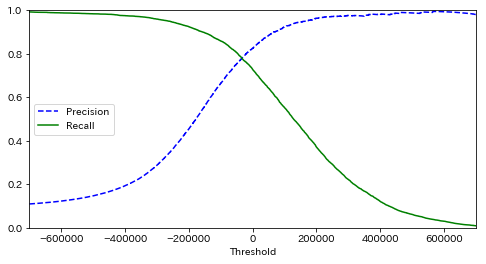

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

これで、閾値を調整して、適合率/再現率のバランスをタスクの性質に合わせられるようになった。適合率と再現率のバランスの取り方としては、次図のように、適合率と再現率を直接対比させる方法もある。

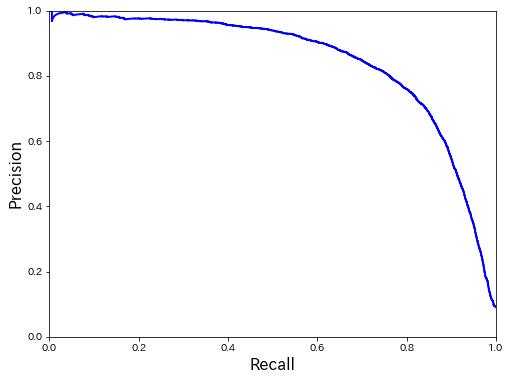

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

再現率が80%を越えたあたりから適合率が急速に落ちていくことがわかる。そのような急降下が始まる直前のところで適合率と再現率のバランスを取りたいところだ。たとえば、再現散る60%のあたりである。しかも、もちろんどこを選ぶかはプロジェクト次第である。

たとえば、90%の適合率を目指すことにしたとする。最初の図を少し拡大して見ると、70,000前後の閾値を使う必要があるということがわかる。その場合、予測は分類器のpredict()メソッドではなく、次のコードで行う。

In [36]:
y_train_pred_90 = (y_scores > 70000)

では、このようにして行った予測の適合率と再現率をチェックしてみよう。

In [37]:
precision_score(y_train_5, y_train_pred_90)

0.9013194062671798

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.6048699501936912

これはすばらしい。適合率が90%の(あるいはそれに十分に近い)分類器が手に入った。ご覧のように、ほとんどどのような適合率の分類器でも簡単に作ることができる。単に閾値を十分高くするだけだ。しかし、それでよいのだろうか。適合率がいくら高くても、再現率が低すぎれば使いものにならない。

## 3.3.5 ROC曲線

二項分類器では、**ROC曲線**(Reveiver Operating Chacteristic: 受信者動作特性曲線)もツールとしてよく使われている。これは適合率/再現率のグラフとよく似ているが、再現率に対する適合率ではなく、**偽陽性率**(false positive ratio: FPR)に対する**真陽性率**(true positive rate: TPR、再現率のもうひとつの名前)をプロットしたものである。FPRは、誤って陽性と分類された陰性インスタンスの割合である。これは、1から**真陽性率**(true negative ratio: TNR)を引いた値と等しい。TNRは、正しく陰性に分類された陰性インスタンスの割合で、**特異度**(specificity)とも呼ばれる。そのため、ROC曲線は1-特異性に対する**感度**(sensitivity: 再現率のこと)をプロットした曲線だと言うことができる。

ROC曲線を描くためには、roc_curve()関数を使ってさまざまな閾値でのTPRとFPRを計算する必要がある。

In [39]:
from sklearn.metrics import roc_curve

In [40]:
fpr, tpr,thresholds = roc_curve(y_train_5, y_scores)

これでMatplotlibを使えば、FPRに対するTPRをプロットすることができる。

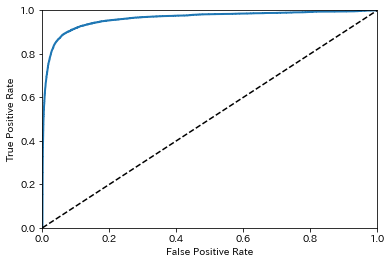

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

ここでもトレードオフがある。再現率(TPR)が上がれば上がるほど、偽陽性(FPR)も上がるのである。点線は、純粋に無作為な分類器のROC曲線を表している。すぐれた分類器は、ROC曲線がこの線からできる限り左上の方に離れた位置を通るものである。

分類器の比較には、**AUC**(area under the curve: 曲線のしたの面積)が使える。完璧な分類器は**ROC AUC**が1になるのに対し、純粋無作為分類器のROC AUCは0.5になる。scikit-learnは、ROC AUCを計算する関数を提供している。

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_train_5, y_scores)

0.9629552648339619

では、つぎにRandomForestClassifierを訓練し、SGDClassifierとの間でROC曲線とROC AUCスコアを比較してみよう。まず、訓練セットの各インスタンスに対するスコアを手に入れなければならないが、RandomForestClassifierクラスには、動作の都合上の理由から、decision_function()メソッドがない。一般に、scikit-learnの分類器は、これらふたつのなかのどちらか片方を持っている。predict_proba()メソッドは、インスタンスあたり1行でクラスあたり1列の配列を返す。個々の要素は、与えられたインスタンスが与えられたクラスに属する確率を示す(たとえば、画像が5を表す確率は70%など)。

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
y_scores_forest = y_probas_forest[:, 1] # score = 陽性クラスの確率
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

これでROC曲線を描く準備が整った。第1のROC曲線もプロットすると、比較できて便利である。

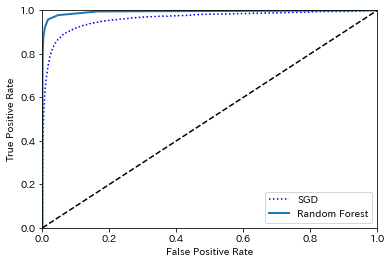

In [47]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

これを見ると、RandomForestClassifierのROC曲線の方がSGDClassifierのROC曲線よりもかなりよい感じがする。ROC AUCスコアも、RandomForestClassifierの方がはるかによい。

In [48]:
roc_auc_score(y_train_5, y_scores_forest)

0.99379478189812

適合率と再現率も計算してみよう。

In [49]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9862892525431225

In [50]:
recall_score(y_train_5, y_train_pred_forest)

0.8227264342372256

適合率が98.5%で再現率が82.8%となる。なかなかのものだ。

今までに二項分類器の訓練、タスクの適切な指標の選択、交差検証を使った分類の評価、ニーズに合った適合率/再現率のバランスの取り方、ROC曲線とROC AUCスコアを使ったさまざまなモデルの比較を説明した。それでは、5かどうかではなくもっと多くの数字を検出できるようにしよう。

## 3.4 他クラス分類

二項分類器はふたつのクラスの間の区別をするだけだったが、**他クラス分類器**(multiclass classifier、**多項分類器**: multinomial classifierとも呼ばれる)は、ふたつ以上のクラスを見分けることができる。

一部のアルゴリズム(ランダムフォレスト分類器や単純ベイズ分類器など)は他クラスを直接処理できるが、そうでないアルゴリズム(サポートベクターマシン分類器や線形分類器など)は厳密に二項分類器である。しかし、複数の二項分類器を使って他クラス分類を行う方法はいくつも考え出されている。

たとえば、数字の画像を10個のクラス(0から9まで)に分類できるシステムを作りたければ、個々の数字のために二項分類器(0検出器、1検出器,2検出器,...)を訓練すればよい。画像を分類するときには、個々の分類器の決定スコアを比較し、もっとも高いスコアを出力した分類器のクラスを選ぶ。これを**OVA法**(one-versus-all)と呼ぶ(**OVR法**: one-versus-restとも言う)。

二項分類器の訓練方法としては、数字のすべてのペアに対して二項分類器を訓練するというものもある。0と1を区別するものでひとつ、0と2を区別するものでひとつ、1と2で区別するものでひとつという形である。これを**OVO法**(one-versus-one)と呼ぶ。$N$個のクラスがある場合、$N \times (N - 1) / 2$個の分類器を訓練しなければならない。MNIST問題の場合、45個のすべての分類器を実行し、もっとも多くの勝利を収めたクラスを選ぶ。OVO法の最大の利点は、訓練セットのうち、区別しなければならないふたつのクラスに属するインスタンスだけを対象として分類器を訓練できることである。

一部のアルゴリズム(サポートベクターマシンなど)は、訓練セットのサイズが大きくなると遅くなるので、そのようなアルゴリズムでは、OVO法を使って、大規模な訓練セットで少数の分類器を訓練するよりも、小さな訓練セットで多数の分類器を訓練するほうが仕事が早くなる。しかし、大半の二項分類アルゴリズムでは、OVAの方がよい。

scikit-learnは、他クラス分類のために二項分類アルゴリズムを使おうとすると、それを検出し、自動的にOVA法を実行する(ただし、SVM分類器ではOVO法が使われる)。SGDClassifierでこれを試してみよう。

In [51]:
sgd_clf.fit(X_train, y_train) # y_train_5ではなくy_train
sgd_clf.predict([some_digit])

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0.])

In [52]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-119387.64592299, -371251.07143373, -282637.3607891 ,
        -149901.31978672, -353200.06651729, -221726.3409516 ,
        -677291.18037268, -258310.92222885, -620972.2043568 ,
        -832122.08731096]])

最高スコアは、実際に5のスコアだということがわかる。

In [53]:
np.argmax(some_digit_scores)

0

In [54]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [55]:
sgd_clf.classes_[5]

5.0

scikit-learnに強制的にOVOやOVAを使わせたいときには、OneVsOneClassifierクラスかOneVsRestClassifierクラスを使う。単純にインスタンスを作り、二項分類器のコンストラクタへ引数として渡せばよい。たとえば、次のコードはSGDClassifierを基礎としてOVO法を使った多クラス分類器を作る。

In [56]:
from sklearn.multiclass import OneVsOneClassifier

In [57]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([3.])

In [58]:
len(ovo_clf.estimators_)

45

RandomForestClassifierの訓練も同じように簡単だ。

In [59]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

ランダムフォレストは、インスタンスを直接多クラスに分類できるので、今回はscikit-learnがOVAやOVOを実行する必要はない。predict_proba()を呼び出せば、分類器が個々のインスタンスをどのクラスに分類するかを示す確率のリストが得られる。

In [60]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

分類器が自分の予測にかなりの自信を持っていることがわかる。配列のインデックス5の位置が0.8だということは、画像が80%の確率で5を表しているとモデルが推定しているということだ。分類器は画像が3かもしれない(20%)とも考えている。

もちろん、次は分類器の評価だ。いつもと同じように、交差検証を使う。cross_val_score()関数でSGDClassifierの適合率を評価してみよう。

In [61]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([0.84463107, 0.84234212, 0.83372506])

すべてのテストフォールドで83%を越えている。無作為分類器なら適合率は10%にしかならないので、これは悪くない数字だが、まだまだ改良の余地はある。たとえば、単純に入力をスケーリングすれば、適合率は90%以上に上がる。

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([0.90781844, 0.90979549, 0.90983648])

## 3.5 誤分類の分析

もちろん、これが本当のプロジェクトなら、前章で行ったように、機械学習プロジェクトチェックリストに従い、データ準備オプションを探索し、複数のモデルを試し、成績のよい少数のモデルのリストを作り、GridSearchCVでハイパーパラメータを調整し、できる限り作業を自動化していくことになる。しかし、ここではすでに有望なモデルが見つかっており、その改良方法を探しているという前提で話を続けていきたい。そのための方法のひとつは、モデルが犯す誤分類のタイプを分析することだ。

まず、混同行列を見てみよう。以前行ったように、cross_val_predict()関数を呼び出してからconfusion_matrix()関数を呼び出すという方法で予測するのである。

In [64]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([[5735,    3,   19,   11,   10,   46,   45,    6,   44,    4],
       [   2, 6439,   49,   28,    6,   51,    6,   12,  136,   13],
       [  56,   34, 5355,   98,   75,   25,   95,   53,  156,   11],
       [  55,   37,  140, 5318,    4,  249,   31,   54,  148,   95],
       [  24,   27,   48,   10, 5372,    6,   45,   23,   85,  202],
       [  72,   40,   40,  182,   76, 4606,  104,   26,  179,   96],
       [  32,   26,   49,    2,   44,   99, 5612,    4,   49,    1],
       [  27,   19,   72,   29,   55,   11,    5, 5783,   18,  246],
       [  62,  137,   77,  136,   13,  150,   57,   22, 5055,  142],
       [  47,   30,   35,   80,  180,   31,    2,  189,   81, 5274]],
      dtype=int64)

数字がたくさんある。Matplotlibのmatshow()関数を使って混同行列のイメージ画像をみるともっと便利になる。

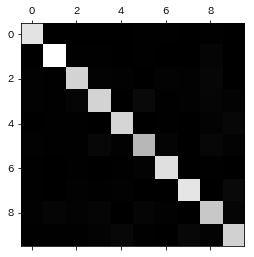

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

この混同行列は、ほとんどのイメージが主対角線に集まっており、正しく分類されているので、かなりよいように見える。5はほかの数字よりも少し暗い色になっているが、それはデータセットに含まれる5の画像が少なかったか、分類器が他の数字と比べて5では性能が低かったことを意味する。実際、両方が当てはまることが確認できる。

プロットの誤りの部分に注目しよう。まず、混同行列の個々の数値を対応するクラスの画像数で割り、誤分類の絶対数ではなく(それでは、画像数の多いクラスが不公平に悪く見えてしまう)、誤り率を比較できるようにする必要がある。

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

次に、対角線に0をセットしてご分類だけを残し、結果をプロットしてみよう。

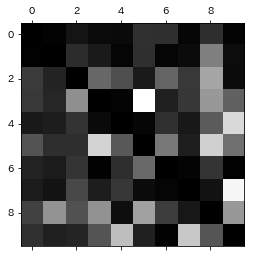

In [67]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

これで分類器が犯す誤分類の種類がはっきりとわかる。行が実際のクラス、列が予測したクラスを表すことを忘れないようにしよう。8、9のクラスの列がかなり明るいことがわかる。これは、8、9がほかの数字と間違われやすいことを示している。逆に、1の行のように暗い色でまとまっている行もある。これは、ほとんどの1が正しく分類されていることを示している(一部は8と間違われているが、それくらいのものである)。誤分類が完全に対照的にはなっていないことに注意しよう。たとえば、誤って8と分類される5の方が5と分類される8よりも多い。

混同行列を分析すると、分類器の改善方法のアイデアが生まれることがよくある。このプロットを見ると、8と9の分類の改善と3と5のご分類の修正に力を注ぎこむとよさそうだ。たとえば、これらの数字については訓練データをもっと集めるようにしてみるとか、分類器を助ける新しい特徴量を作ることが考えられる。たとえば、閉じた輪の数を数えるアルゴリズムを書いてみてはどうだろうか。(たとえば、8なら2個、6なら1個、5ならなしになる)。あるいは、画像を前処理して(scikit-image、Pillow、OpenCVなどを使う)、閉じた輪などのパターンをより目立つようにする方法もある。

個別の誤差を分析するのも、分類器が何を行っているかについて、なぜ分類を誤るかについての洞察を得るための方法として役立つが、これはより難しく時間のかかる作業になる。たとえば、3と5の例をプロットしてみよう(plot_digits()関数はMatplotlibのimshow()を使っているだけである)。

In [68]:
import matplotlib as mpl

In [77]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [69]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

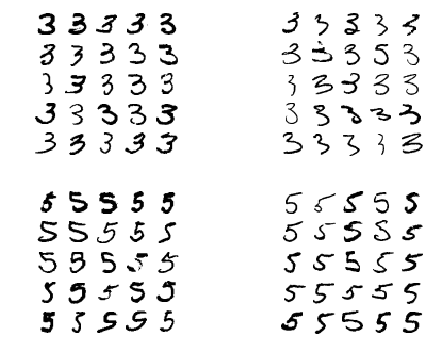

In [70]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 6))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

左側の2個の5×5の塊は3と分類された数字、右側の2個の5×5の塊は5と分類された数字である。分類器が誤分類した数字(左下と右下の塊)のなかには、書き方がひどくて人間でも見違えるのではないかというものが含まれているが(たとえば、第8行第1列の5と称するものは、本当に3のように見える)。しかし、誤分類された画像の大半は私たちの目からは明らかな誤りに見え、分類器がなぜ間違えたのか理解しがたい。理由は、私たちが単純な線形モデルのSGDClassifierを使ったからである。SGDClassifierは、各ピクセルにクラスごとに重みを与え、新しい画像を与えられると、重みを与えられたピクセルの明度を合計し、それをクラスごとのスコアとしているだけだ。3と5は少数のピクセルの違いだけなので、このモデルは簡単に3と5を間違えるのである。

3と5でもっとも大きく違うのは、上の線と下の円弧をつなぐ短い線の位置である。この線の位置を少し左寄りにして3を描くと、分類器はそれを5に分類する。逆も同様である。言い換えれば、この分類器は、画像の平行移動と回転に敏感に反応する。そこで、画像があまり回転されていない形で中央に現れるように前処理すれば、3/5の誤分類を削減するための方法のひとつになる。この前の処理は、おそらくほかの誤差の削減にも役立つだろう。

## 3.6 多ラベル分類

今までは、インスタンスはどれもひとつのクラスに属するだけだった。しかし、個々のインスタンスに複数のクラスを出力するような分類器がほしい場合がある。たとえば、顔認識の分類器について考えてみよう。同じ写真で複数の人を認識したときにはどのようにすればよいだろうか。もちろん、認識した人ごとにひとつのラベルを付けるべきだ。たとえば、分類器がAlice, Bob, Charlieの3人の顔を認識するように訓練されていたとする。その場合、AliceとCharlieが写っている写真を与えたら、分類器は\[1,0,1\](Aliceはyes、Bobはno、Charlieはyesという意味)と出力しなければならない。複数の2値ラベルを出力するよのような分類システムを**多ラベル問題**(multilabel classification)システムと呼ぶ。

まだ顔認識自体には深入りしないが、説明のためにもっと単純な例を見てみよう。

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

このコードは、個々の数字の画像に対してふたつのターゲットラベルを持つy_multilabel配列を生成する。最初のラベルは数字が大きい値(7、8、9)かどうか、第2のラベルは数字が奇数かどうかを示す。最後の2行はKNeighborsClassifier(これは多ラベル分類ををサポートするが、どの分類器でも多ラベル分類をサポートするわけではない)のインスタンスを作り、ターゲットがふたつある配列で訓練する。これで予測すると、ふたつのラベルが出力されることがわかる。

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

そして、分類器は正しく仕事をしている。数字は5は本当に大きくなく(False)、奇数(True)である。

多ラベル分類器の評価方法は多数あり、プロジェクト次第で正しい指標の選び方は異なる。たとえば、個々のラベルのF値(または、今までに説明してきた二項分類器のその他の指標)を測り、単純に平均値を計算するのもひとつの方法だ。次のコードは、すべてのラベルのF値の平均を計算する。

In [74]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9769528616913967

これは、すべてのラベルの重要度が等しいことを前提としているが、そうではない場合もあるだろう。たとえば、BobやCharlieの写真よりもAliceの写真がずっと多い場合には、Aliceが写った写真に対するスコアに重みを与えたいかもしれない。そのような場合には、単純な方法として、**サポート**(support、すなわちターゲットラベルを持つインスタンスの数)に応じた重みを各ラベルに与えることができる。先ほどのコードで、average="weighted"を指定すればよい。

## 3.7 多出力分類

この章で取り上げる分類タスクの最後のタイプは、**多出力多クラス分類**(multioutput-multiclass classification、あるいは単純に**多クラス分類**: multioutut classification)である。これは単純に個々のラベルが多クラスでもよい(複数の値を持ってよい)という形に多ラベル分類を一般化したものだ。

具体例として、画像からノイズを取り除くシステムを作ってみよう。このシステムにノイズの入った数字の画像を与えると、MNIST画像のように、ピクセルの明度の配列という形で表現されたクリーンな数字の画像を出力する(おそらく)。分類器の出力が多ラベル(ピクセルごとに1ラベル)で、個々のラベルが複数の値(ピクセルの明度は0から255までの範囲)だということに注意しよう。だから、これは多出力分類システムの例になっている。

まず、NumPyのrandint()関数でMNIST画像のピクセルの明度にノイズを加えて訓練セットとテストセットを作るところから始めよう。

In [75]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

テストセットの画像をちょっと覗いてみよう(テストデータを覗こうとしているので、みなさんはここで眉をひそめなければならないところだ)。

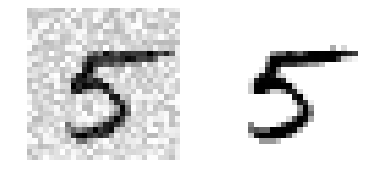

In [78]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

左側がノイズの入った入力画像、右がクリーンなターゲット画像である。では、分類器を訓練して、この画像をクリーンにしてみよう。

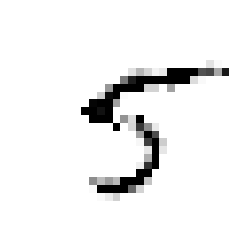

In [80]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

ターゲットと十分似ているようだ。これで私たちの分類器の旅を終えることにしよう。みなさんは分類のタスクの優れた指標の選び方、適合率/再現率のバランスの取り方、分類器の比較方法、そしてさまざまなタスクのための優れた分類システムの構築方法を覚えたはずだ。